In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
insurance_filepath = '/Users/micah/build/DataVisualisation/input/insurance.csv'
insurance_data = pd.read_csv(insurance_filepath)

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='bmi', ylabel='charges'>

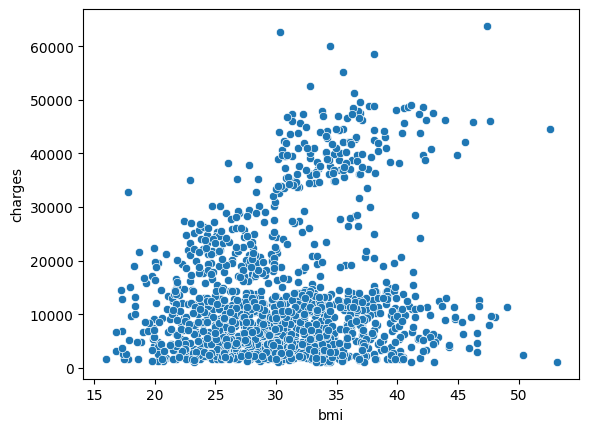

In [4]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

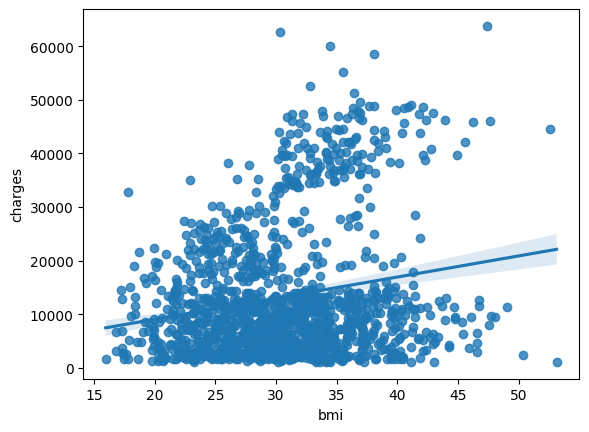

In [5]:
# Add a regression line, a line that best fits the data
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

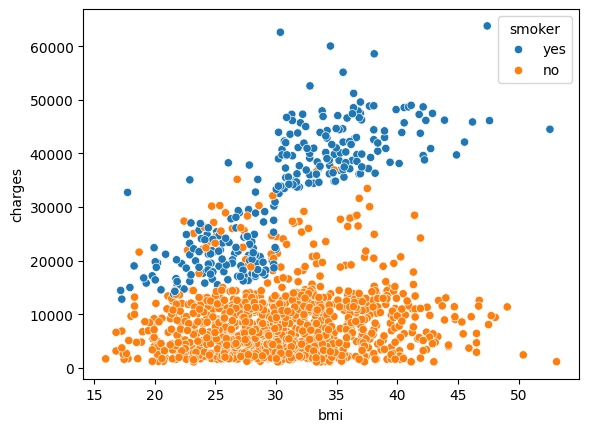

In [6]:
# Colour coded scatter plots with multiple relationships
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

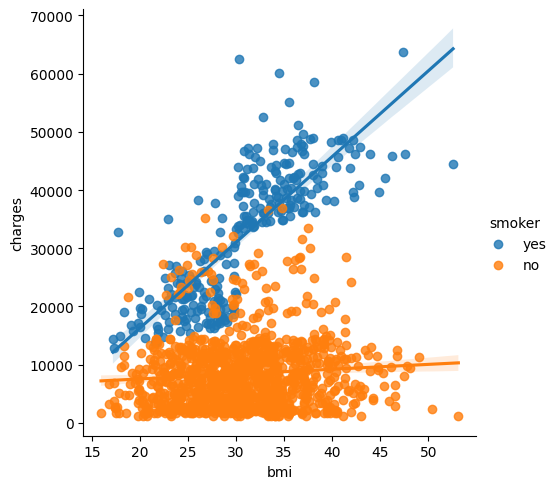

In [7]:
# Add two regression lines
# Instead of calling x=insurance_data['bmi'], we just call the column name itself
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

/Users/micah/mambaforge/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/Users/micah/mambaforge/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


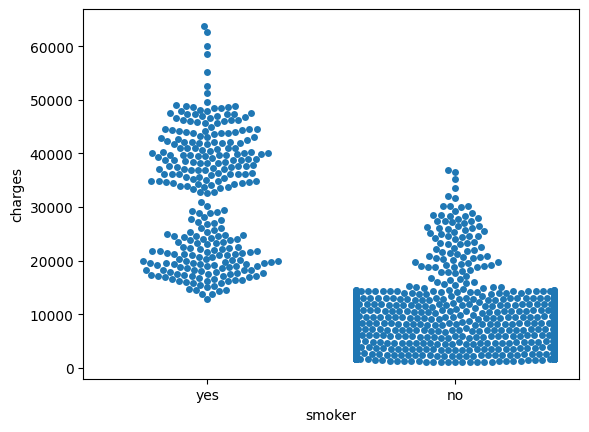

In [8]:
# A scatter plot that features a categorical variable (like "smoker") on one of the main axes.
# Refered this plot type as a categorical scatter plot, and is built with the sns.swarmplot command.
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

In [14]:
candy_filepath = '/Users/micah/build/DataVisualisation/input/candy.csv'
candy_data = pd.read_csv(candy_filepath, index_col='id')
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


In [22]:
# Find the highest value, given the column name
def highest(header, data):
  hi = 0
  for n, i in enumerate(data[header]):
    if i > hi:
      hi = i
      comp_name = data['competitorname'][n]
  return hi, comp_name

# Find most popular (highest winpercent) candy
highest('winpercent', candy_data)

(84.18029, "Reese's Peanut Butter cup")

Text(0.5, 1.0, "Relationship between 'sugarpercent' and 'winpercent'")

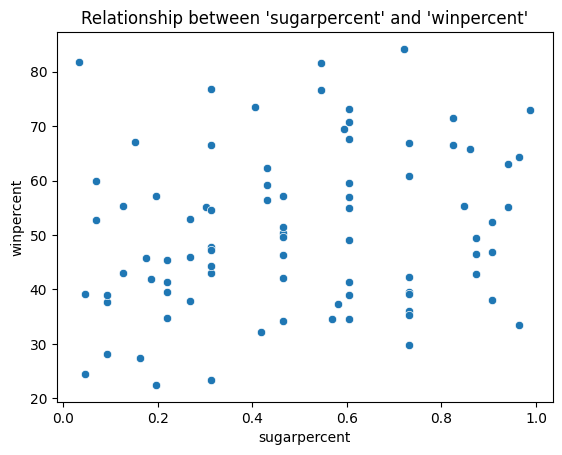

In [27]:
# Scatter plot showing the relationship between 'sugarpercent' and 'winpercent'
# plt.figure(figsize=(10,6))
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])
plt.title("Relationship between 'sugarpercent' and 'winpercent'")

# No strong correlation between sugarpercent and winpercent

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

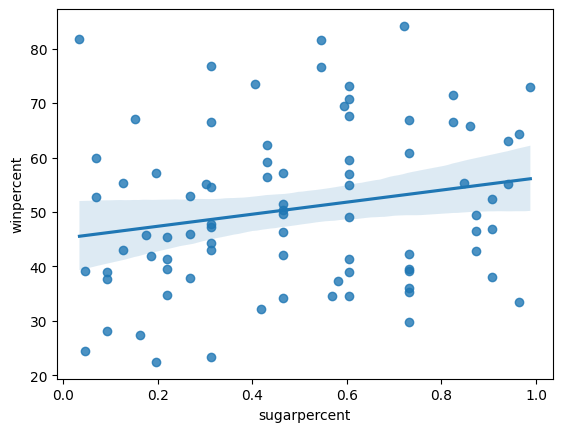

In [29]:
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])
# Regression line has a slight positive slope, 
# therefore there is a slightly positive correlation between 'winpercent' and 'sugarpercent'

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

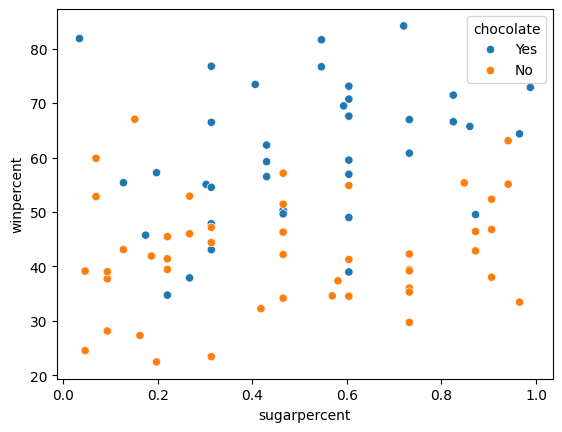

In [30]:
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])

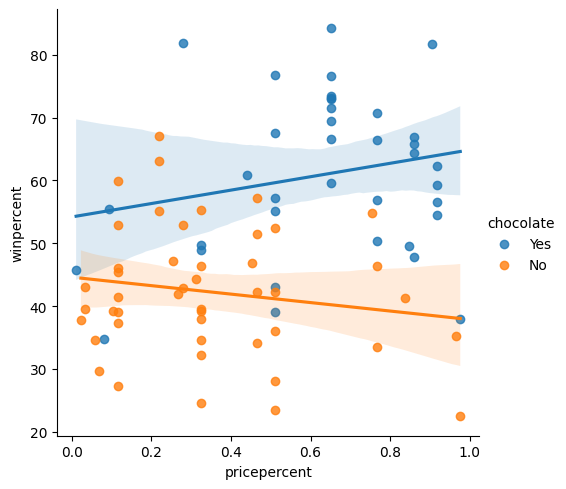

In [37]:
sns.lmplot(x='pricepercent', y='winpercent', hue='chocolate', data=candy_data)
# From the regression lines the pattern spotted is that with chocolate there is a slightly positive correlation
# between 'pricepercent' and 'winpercent'.
# Meaning that more expensive chocolate tends to be slightly more popular
# Whereas without chocolate, there is a sightly negative correlation between
# 'pricepercent' and 'winpercent'
# Menaing that if candies don't have chocolate, they tend to be more popular the cheaper they are.
# (Dataset is quite small, so more candies should be added to the dataset)

<Axes: xlabel='chocolate', ylabel='winpercent'>

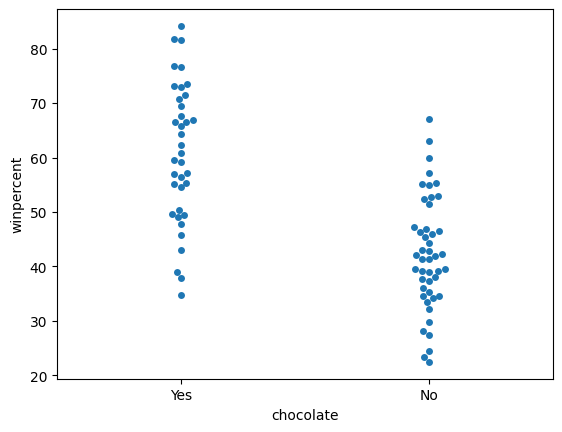

In [39]:
sns.swarmplot(x=candy_data['chocolate'], y=candy_data['winpercent'])
# Here to convey whether a candy is more popular with chocolate,
# the catergorical scatter plot is the more appropriate plot, as the scatter plot with regression lines
# conveys more information which could distract from the main point.

In [57]:
# Subsetting data
candy_data.sort_values(['chocolate','fruity'],ascending=[False, True])
candy_sugar = candy_data[candy_data['sugarpercent'] > 0.6]
candy_sugar_choc = candy_data[(candy_data['sugarpercent'] > 0.6) & (candy_sugar['chocolate'] == 'Yes')]
candy_name = ['Almond Joy', '3 Musketeers']
al_3 = candy_sugar[(candy_sugar['competitorname'].isin(candy_name)) & (candy_data['sugarpercent'] > 0.6) & (candy_sugar['chocolate'] == 'Yes')]
print(al_3)

   competitorname chocolate fruity caramel peanutyalmondy nougat  \
id                                                                 
1    3 Musketeers       Yes     No      No             No    Yes   

   crispedricewafer hard  bar pluribus  sugarpercent  pricepercent  winpercent  
id                                                                              
1                No   No  Yes       No         0.604         0.511   67.602936  


/var/folders/__/qxpn4zxs66d546p_bm57qm9r0000gn/T/ipykernel_13956/3850221124.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  al_3 = candy_sugar[(candy_sugar['competitorname'].isin(candy_name)) & (candy_data['sugarpercent'] > 0.6) & (candy_sugar['chocolate'] == 'Yes')]
